10082
1726


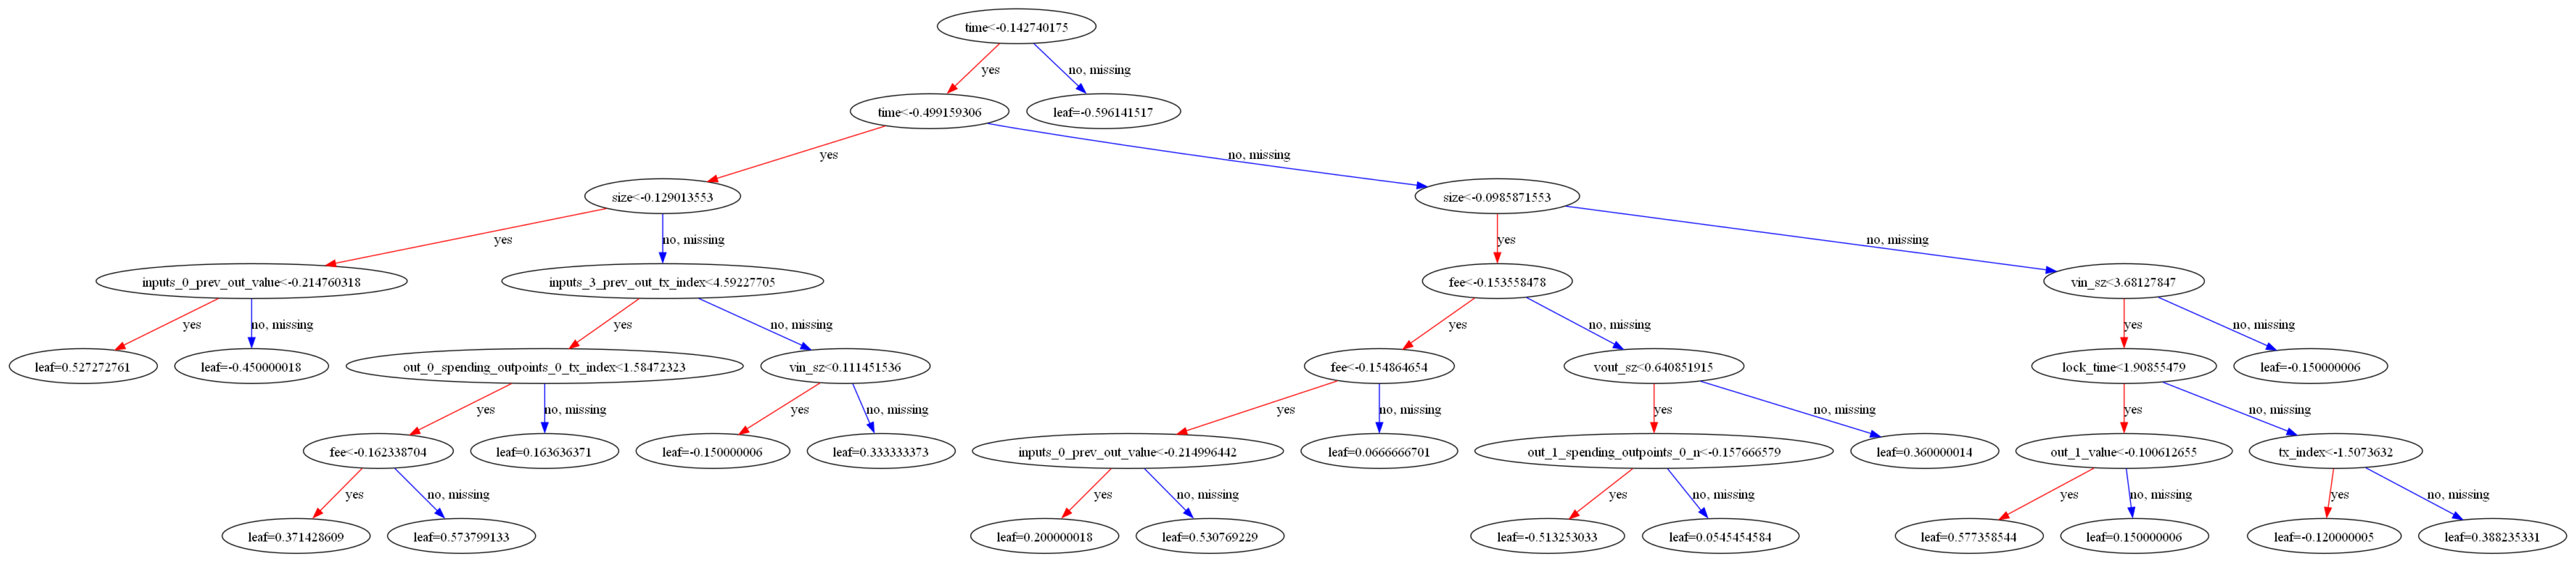

In [ ]:
import json
from matplotlib import pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from pickle import load
import os

model_RF = load(open("models/RF_model_20_80.sav", 'rb'))


features_json_file = "all_features.json"
with open(features_json_file, "r") as f:
    json_features = f.read()
features = json.loads(json_features)
features.remove("elliptic_label")

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# First tree from RF

# tree = model_RF.estimators_[1]
# dot_data = export_graphviz(tree,
#                             feature_names=features,
#                             filled=True,  
#                             max_depth=10, 
#                             impurity=False, 
#                             proportion=True)
# graph = graphviz.Source(dot_data)
# display(graph)

#Imbalance
import pandas as pd

df_ = pd.read_json('elliptic_txs.json')
print(len(df_.loc[df_['elliptic_label'] == 2]))
print(len(df_.loc[df_['elliptic_label'] == 1]))


# tree
from xgboost import plot_tree

model_file = "models/RF_model_20_80.sav"
model = load(open(model_file, 'rb'))

fig, ax = plt.subplots(figsize=(60, 60))
plot_tree(model, ax=ax)
plt.savefig('out.pdf')